<a href="https://colab.research.google.com/github/parneetsingh022/tensorflow-deep-learning/blob/main/01_Regression_Using_TensorFlow.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import tensorflow as tf
import pandas as pd
import matplotlib.pyplot as plt

In [ ]:
# reading in the insurance dataset
insurance = pd.read_csv("https://raw.githubusercontent.com/stedy/Machine-Learning-with-R-datasets/master/insurance.csv")
insurance

,age,sex,bmi,children,smoker,region,charges
0,19,female,27.900,0,yes,southwest,16884.92400
1,18,male,33.770,1,no,southeast,1725.55230
2,28,male,33.000,3,no,southeast,4449.46200
3,33,male,22.705,0,no,northwest,21984.47061
4,32,male,28.880,0,no,northwest,3866.85520
...,...,...,...,...,...,...,...
1333,50,male,30.970,3,no,northwest,10600.54830
1334,18,female,31.920,0,no,northeast,2205.98080
1335,18,female,36.850,0,no,southeast,1629.83350
1336,21,female,25.800,0,no,southwest,2007.94500


In [ ]:
# Using one hot incoding
insurance_one_hot = pd.get_dummies(insurance)
insurance_one_hot.head()

,age,bmi,children,charges,sex_female,sex_male,smoker_no,smoker_yes,region_northeast,region_northwest,region_southeast,region_southwest
0,19,27.900,0,16884.92400,1,0,0,1,0,0,0,1
1,18,33.770,1,1725.55230,0,1,1,0,0,0,1,0
2,28,33.000,3,4449.46200,0,1,1,0,0,0,1,0
3,33,22.705,0,21984.47061,0,1,1,0,0,1,0,0
4,32,28.880,0,3866.85520,0,1,1,0,0,1,0,0


In [ ]:
# Splitting into X and y
X = insurance_one_hot.drop("charges", axis=1)
y = insurance_one_hot["charges"]

In [ ]:
# View X
X.head()

,age,bmi,children,sex_female,sex_male,smoker_no,smoker_yes,region_northeast,region_northwest,region_southeast,region_southwest
0,19,27.900,0,1,0,0,1,0,0,0,1
1,18,33.770,1,0,1,1,0,0,0,1,0
2,28,33.000,3,0,1,1,0,0,0,1,0
3,33,22.705,0,0,1,1,0,0,1,0,0
4,32,28.880,0,0,1,1,0,0,1,0,0


In [ ]:
# View y
y.head()

0    16884.92400
1     1725.55230
2     4449.46200
3    21984.47061
4     3866.85520
Name: charges, dtype: float64

In [ ]:
# splitting data into train and test split
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.15, random_state=42)

In [ ]:
# Length of columns in X_train
len(X_train.columns)

11

In [ ]:
tf.random.set_seed(42)



model = tf.keras.Sequential([
    tf.keras.layers.Dense(1000, input_shape=(len(X_train.columns),),activation="relu"),
    tf.keras.layers.Dense(500, activation="relu"),
    tf.keras.layers.Dense(100, activation="relu"),
    tf.keras.layers.Dense(1),
])

model.compile(loss=tf.keras.losses.mae, # mae is mean absolute error
              optimizer=tf.keras.optimizers.Adam(lr=0.001), # sgd is short for stochastic gradient descent
              metrics=["mae"])

history = model.fit(X_train,y_train,epochs=100,  verbose=0)

ValueError: ignored

In [ ]:
model.evaluate(X_test,y_test)

7/7 [==============================] - 0s 8ms/step - loss: 1982.2402 - mae: 1982.2402


[1982.240234375, 1982.240234375]

Text(0.5, 0, 'epoch')

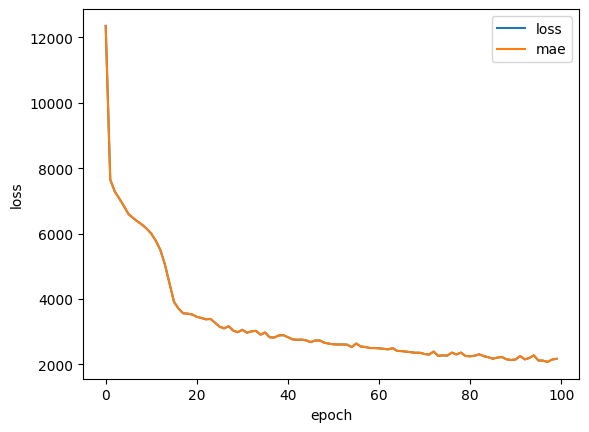

In [ ]:
pd.DataFrame(history.history).plot()
plt.ylabel("loss")
plt.xlabel("epoch")

❓Question: How long should you train for? It depends. Really... it depends on the problem you're working on. However, many people have asked this question before... so TensorFlow has a solution! It's called the EarlyStopping

## Preprocessing data (normalization and standardization)

📖[Scale, Standardize, or Normalize with Scikit-Learn by **Jeff Hale**](https://towardsdatascience.com/scale-standardize-or-normalize-with-scikit-learn-6ccc7d176a02)

In terms of scaling values, neural networks tend to prefer normalization.

If your're note sure on which to chose you can try both and see which performs better.


As we can see below the values of bmi, age and children have different scale. Thus in order to make our ml model to improve me must make them have same scale

array([[<Axes: title={'center': 'bmi'}>, <Axes: title={'center': 'age'}>],
       [<Axes: title={'center': 'children'}>, <Axes: >]], dtype=object)

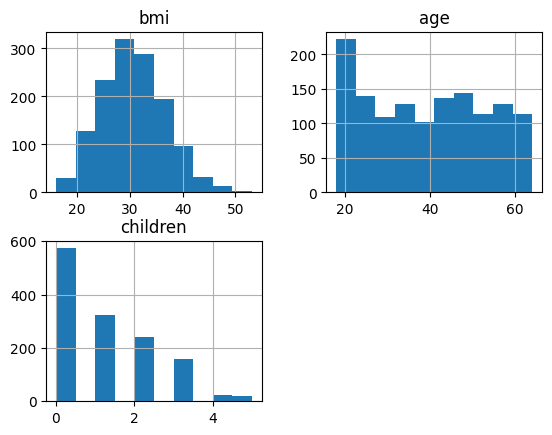

In [ ]:
# prompt: create a hist plot of bmi, age, and children in 'X' dataframe in different plots. Only of these three values

X[['bmi', 'age', 'children']].hist()


To prepare our data, we can borrow a few classes from Scikit-Learn

In [ ]:
from sklearn.compose import make_column_transformer
from sklearn.preprocessing import MinMaxScaler, OneHotEncoder
from sklearn.model_selection import train_test_split

# Create a column transformer
ct = make_column_transformer(
    (MinMaxScaler(), ["age", "bmi", "children"]), # turn all values in these columns between zero and ones
    (OneHotEncoder(handle_unknown="ignore"), ["sex", "smoker", "region"])
)

# Create X & y values
X = insurance.drop("charges", axis=1)
y = insurance["charges"]

# train-test split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Fit the column transformer to our training data
ct.fit(X_train)

# transform training and test data with normalization (MinMaxScaler and OneHotEncoding)
X_train_normal = ct.transform(X_train)
X_test_normal = ct.transform(X_test)

In [ ]:
tf.random.set_seed(42)

callback = tf.keras.callbacks.EarlyStopping(monitor='loss', patience=10)

model2 = tf.keras.Sequential([
    tf.keras.layers.Dense(1000,activation="relu"),
    tf.keras.layers.Dropout(0.1),
    tf.keras.layers.Dense(500, activation="relu"),
    tf.keras.layers.Dropout(0.05),
    tf.keras.layers.Dense(100, activation="relu"),
    tf.keras.layers.Dropout(0.01),
    tf.keras.layers.Dense(50, activation="relu"),
    tf.keras.layers.Dense(10, activation="relu"),
    tf.keras.layers.Dense(1),
])

model2.compile(loss=tf.keras.losses.mae, # mae is mean absolute error
              optimizer=tf.keras.optimizers.Adam(learning_rate=0.0005), # sgd is short for stochastic gradient descent
              metrics=["mae"])

history = model2.fit(X_train_normal,y_train,epochs=200,verbose=1, callbacks=[callback])

Epoch 1/200
34/34 [==============================] - 4s 21ms/step - loss: 13341.1992 - mae: 13341.1992
Epoch 2/200
34/34 [==============================] - 1s 21ms/step - loss: 13125.6436 - mae: 13125.6436
Epoch 3/200
34/34 [==============================] - 1s 16ms/step - loss: 10666.6387 - mae: 10666.6387
Epoch 4/200
34/34 [==============================] - 1s 24ms/step - loss: 7872.1143 - mae: 7872.1143
Epoch 5/200
34/34 [==============================] - 1s 22ms/step - loss: 7479.5522 - mae: 7479.5522
Epoch 6/200
34/34 [==============================] - 1s 18ms/step - loss: 7017.3716 - mae: 7017.3716
Epoch 7/200
34/34 [==============================] - 0s 12ms/step - loss: 6362.0195 - mae: 6362.0195
Epoch 8/200
34/34 [==============================] - 0s 11ms/step - loss: 5355.9307 - mae: 5355.9307
Epoch 9/200
34/34 [==============================] - 0s 13ms/step - loss: 4358.9980 - mae: 4358.9980
Epoch 10/200
34/34 [==============================] - 1s 15ms/step - loss: 3750.6606 

In [ ]:
# [1728.356689453125, 1728.356689453125]
model2.evaluate(X_test_normal, y_test)

9/9 [==============================] - 0s 4ms/step - loss: 1784.6173 - mae: 1784.6173


[1784.6173095703125, 1784.6173095703125]

Text(0.5, 0, 'epoch')

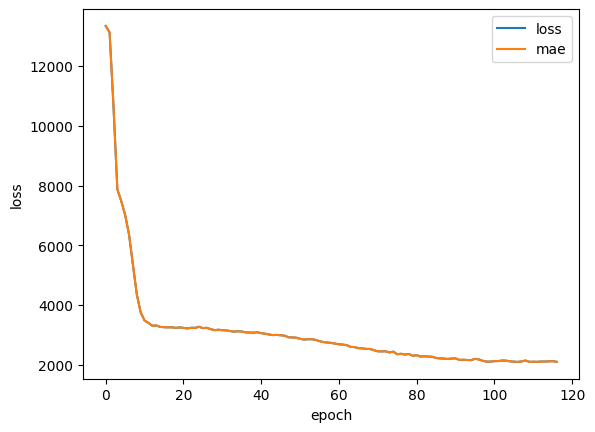

In [ ]:
pd.DataFrame(history.history).plot()
plt.ylabel("loss")
plt.xlabel("epoch")